This was the initial attempt at discovering optimized heels, I've included it particularly because it visualizes the paths at the end. 

The basics of what this notebook does:
-Generate array to represent the heel structure
-Generate a graph from that array to represent how the knight can move on the board
-Find all solutions for getting one of the four knights to the end
-For all of those solutions, find all the solutions for the next knight... and so on until you have all possible sets of 4 paths (where each knight goes from start to finish)
-Get rid of all the sets of paths where some squares dont get visited
-Check against turns and crossings metrics

-Parker

In [1]:
#This throws together the heel structure as a 2-d array, quite hard-coded
def generate_small_heel():
    final_set = set()
    for x in range(8):
        for y in range(2):
            final_set.add((x,y))
    for x in [0,1,4,5,6,7]:
        final_set.add((x,2))
    final_set.add((6,3))
    final_set.add((7,3))
    return final_set


In [2]:
#Visualize our heel to make sure it's right

small_heel = generate_small_heel()

start_points = set([(x,y) for x in range(2) for y in range(1,3)])
finish_points = set([(x,y) for x in range(6,8) for y in range(2,4)])

for y in range(5,-1,-1):
    s = ""
    for x in range(10):
        if (x,y) in small_heel:
            if (x,y) in start_points:
                s += "S"
            elif (x,y) in finish_points:
                s += "F"
            else:
                s += "@"
        else:
            s += "."
    print(s)

..........
..........
......FF..
SS..@@FF..
SS@@@@@@..
@@@@@@@@..


In [3]:
#Use the basic rules of knight moves to generate a graph from the array
def generate_connections(P,allowed_coords):
    final_set = set()
    x = P[0]
    y = P[1]
    for diffx, diffy in [(-2,-1),(-2,1),(-1,-2),(-1,2),(1,-2),(1,2),(2,-1),(2,1)]: #theres a smart way to generate this that im not bothering to think of :)
        candidate_coord = (x+diffx,y+diffy)
        if candidate_coord in allowed_coords:
            final_set.add(candidate_coord)
    return final_set

In [4]:
connection_map_small_heel = {p:generate_connections(p,small_heel) for p in small_heel}

In [5]:
#if we reach an "F" that knight is considered done, and we will begin searches on the next night

for tup in finish_points:
    connection_map_small_heel[tup] = "Done"
for v in connection_map_small_heel.values():
    for coor in start_points:
        if type(v) == type(set()):
            v.discard(coor)

In [6]:
connection_map_small_heel

{(4, 0): {(2, 1), (5, 2), (6, 1)},
 (3, 1): {(1, 0), (5, 0), (5, 2)},
 (5, 1): {(3, 0), (6, 3), (7, 0), (7, 2)},
 (0, 2): {(1, 0), (2, 1)},
 (1, 0): {(3, 1)},
 (6, 2): 'Done',
 (7, 1): {(5, 0), (5, 2), (6, 3)},
 (4, 2): {(2, 1), (3, 0), (5, 0), (6, 1), (6, 3)},
 (3, 0): {(4, 2), (5, 1)},
 (5, 0): {(3, 1), (4, 2), (6, 2), (7, 1)},
 (0, 1): {(2, 0)},
 (1, 2): {(0, 0), (2, 0), (3, 1)},
 (2, 1): {(0, 0), (4, 0), (4, 2)},
 (6, 1): {(4, 0), (4, 2), (7, 3)},
 (7, 0): {(5, 1), (6, 2)},
 (7, 3): 'Done',
 (4, 1): {(2, 0), (6, 0), (6, 2)},
 (5, 2): {(3, 1), (4, 0), (6, 0), (7, 1), (7, 3)},
 (0, 0): {(2, 1)},
 (1, 1): {(3, 0)},
 (2, 0): {(4, 1)},
 (7, 2): 'Done',
 (6, 0): {(4, 1), (5, 2), (7, 2)},
 (6, 3): 'Done'}

In [7]:
#exhaustive search across the space of paths from S to F
def exhaustive_paths(path,connections,final_paths,dont_use = set()):
    curr = path[-1]
    for neigh in connections[curr]:
        if neigh == "D":
            final_paths.append(path)
            return
            
        if not neigh in path and not neigh in dont_use:
            exhaustive_paths(path + [neigh],connections,final_paths,dont_use)
        



In [8]:
#all paths for the first knight
first_point_exhaust = []
exhaustive_paths([(0,2)],connection_map_small_heel,first_point_exhaust)
print(first_point_exhaust)

[[(0, 2), (1, 0), (3, 1), (5, 0), (6, 2)], [(0, 2), (1, 0), (3, 1), (5, 0), (7, 1), (6, 3)], [(0, 2), (1, 0), (3, 1), (5, 0), (7, 1), (5, 2), (4, 0), (6, 1), (4, 2), (3, 0), (5, 1), (7, 2)], [(0, 2), (1, 0), (3, 1), (5, 0), (7, 1), (5, 2), (4, 0), (6, 1), (4, 2), (3, 0), (5, 1), (6, 3)], [(0, 2), (1, 0), (3, 1), (5, 0), (7, 1), (5, 2), (4, 0), (6, 1), (4, 2), (3, 0), (5, 1), (7, 0), (6, 2)], [(0, 2), (1, 0), (3, 1), (5, 0), (7, 1), (5, 2), (4, 0), (6, 1), (4, 2), (6, 3)], [(0, 2), (1, 0), (3, 1), (5, 0), (7, 1), (5, 2), (4, 0), (6, 1), (7, 3)], [(0, 2), (1, 0), (3, 1), (5, 0), (7, 1), (5, 2), (4, 0), (2, 1), (4, 2), (6, 1), (7, 3)], [(0, 2), (1, 0), (3, 1), (5, 0), (7, 1), (5, 2), (4, 0), (2, 1), (4, 2), (3, 0), (5, 1), (7, 2)], [(0, 2), (1, 0), (3, 1), (5, 0), (7, 1), (5, 2), (4, 0), (2, 1), (4, 2), (3, 0), (5, 1), (6, 3)], [(0, 2), (1, 0), (3, 1), (5, 0), (7, 1), (5, 2), (4, 0), (2, 1), (4, 2), (3, 0), (5, 1), (7, 0), (6, 2)], [(0, 2), (1, 0), (3, 1), (5, 0), (7, 1), (5, 2), (4, 0), 

In [9]:
#number of possible paths for the first knight
len(first_point_exhaust)

108

In [10]:
#for each path, find all the possible paths for the second knight
i = 1
total = len(first_point_exhaust)
first_and_second_point_exhaust = []
for path in first_point_exhaust:
    print(i,"of",total,"...")
    temp = []
    exhaustive_paths([(1,2)],connection_map_small_heel,temp,dont_use = set(path))
    if temp != []:
        for path_two in temp:
            first_and_second_point_exhaust.append([path,path_two])
            
    i += 1

1 of 108 ...
2 of 108 ...
3 of 108 ...
4 of 108 ...
5 of 108 ...
6 of 108 ...
7 of 108 ...
8 of 108 ...
9 of 108 ...
10 of 108 ...
11 of 108 ...
12 of 108 ...
13 of 108 ...
14 of 108 ...
15 of 108 ...
16 of 108 ...
17 of 108 ...
18 of 108 ...
19 of 108 ...
20 of 108 ...
21 of 108 ...
22 of 108 ...
23 of 108 ...
24 of 108 ...
25 of 108 ...
26 of 108 ...
27 of 108 ...
28 of 108 ...
29 of 108 ...
30 of 108 ...
31 of 108 ...
32 of 108 ...
33 of 108 ...
34 of 108 ...
35 of 108 ...
36 of 108 ...
37 of 108 ...
38 of 108 ...
39 of 108 ...
40 of 108 ...
41 of 108 ...
42 of 108 ...
43 of 108 ...
44 of 108 ...
45 of 108 ...
46 of 108 ...
47 of 108 ...
48 of 108 ...
49 of 108 ...
50 of 108 ...
51 of 108 ...
52 of 108 ...
53 of 108 ...
54 of 108 ...
55 of 108 ...
56 of 108 ...
57 of 108 ...
58 of 108 ...
59 of 108 ...
60 of 108 ...
61 of 108 ...
62 of 108 ...
63 of 108 ...
64 of 108 ...
65 of 108 ...
66 of 108 ...
67 of 108 ...
68 of 108 ...
69 of 108 ...
70 of 108 ...
71 of 108 ...
72 of 108 ...
7

In [11]:
#sanity check that the paths look legit
print(first_and_second_point_exhaust[0])

#the number of sets of paths for the first two knights from S to F
print(len(first_and_second_point_exhaust))

[[(0, 2), (1, 0), (3, 1), (5, 0), (6, 2)], [(1, 2), (2, 0), (4, 1), (6, 0), (7, 2)]]
507


In [12]:
#add in the third knight..
i = 1
total = len(first_and_second_point_exhaust)
first_and_second_and_third_point_exhaust = []
for paths in first_and_second_point_exhaust:
    path_a = paths[0]
    path_b = paths[1]
    
    
    print(i,"of",total,"...")
    temp = []
    exhaustive_paths([(0,1)],connection_map_small_heel,temp,dont_use = set(path_a + path_b))
    if temp != []:
        for path_three in temp:
            first_and_second_and_third_point_exhaust.append([path_a,path_b,path_three])
            
    i += 1

1 of 507 ...
2 of 507 ...
3 of 507 ...
4 of 507 ...
5 of 507 ...
6 of 507 ...
7 of 507 ...
8 of 507 ...
9 of 507 ...
10 of 507 ...
11 of 507 ...
12 of 507 ...
13 of 507 ...
14 of 507 ...
15 of 507 ...
16 of 507 ...
17 of 507 ...
18 of 507 ...
19 of 507 ...
20 of 507 ...
21 of 507 ...
22 of 507 ...
23 of 507 ...
24 of 507 ...
25 of 507 ...
26 of 507 ...
27 of 507 ...
28 of 507 ...
29 of 507 ...
30 of 507 ...
31 of 507 ...
32 of 507 ...
33 of 507 ...
34 of 507 ...
35 of 507 ...
36 of 507 ...
37 of 507 ...
38 of 507 ...
39 of 507 ...
40 of 507 ...
41 of 507 ...
42 of 507 ...
43 of 507 ...
44 of 507 ...
45 of 507 ...
46 of 507 ...
47 of 507 ...
48 of 507 ...
49 of 507 ...
50 of 507 ...
51 of 507 ...
52 of 507 ...
53 of 507 ...
54 of 507 ...
55 of 507 ...
56 of 507 ...
57 of 507 ...
58 of 507 ...
59 of 507 ...
60 of 507 ...
61 of 507 ...
62 of 507 ...
63 of 507 ...
64 of 507 ...
65 of 507 ...
66 of 507 ...
67 of 507 ...
68 of 507 ...
69 of 507 ...
70 of 507 ...
71 of 507 ...
72 of 507 ...
7

In [13]:
print(len(first_and_second_and_third_point_exhaust))

290


In [14]:
print(first_and_second_and_third_point_exhaust[0])

[[(0, 2), (1, 0), (3, 1), (5, 0), (6, 2)], [(1, 2), (0, 0), (2, 1), (4, 0), (6, 1), (4, 2), (3, 0), (5, 1), (7, 2)], [(0, 1), (2, 0), (4, 1), (6, 0), (5, 2), (7, 1), (6, 3)]]


In [15]:
#and the fourth..
i = 1
total = len(first_and_second_and_third_point_exhaust)
first_and_second_and_third_and_fourth_point_exhaust = []
for paths in first_and_second_and_third_point_exhaust:
    path_a = paths[0]
    path_b = paths[1]
    path_c = paths[2]
    
    print(i,"of",total,"...")
    temp = []
    exhaustive_paths([(1,1)],connection_map_small_heel,temp,dont_use = set(path_a + path_b + path_c))
    if temp != []:
        for path_four in temp:
            first_and_second_and_third_and_fourth_point_exhaust.append([path_a,path_b,path_c,path_four])
            
    i += 1

1 of 290 ...
2 of 290 ...
3 of 290 ...
4 of 290 ...
5 of 290 ...
6 of 290 ...
7 of 290 ...
8 of 290 ...
9 of 290 ...
10 of 290 ...
11 of 290 ...
12 of 290 ...
13 of 290 ...
14 of 290 ...
15 of 290 ...
16 of 290 ...
17 of 290 ...
18 of 290 ...
19 of 290 ...
20 of 290 ...
21 of 290 ...
22 of 290 ...
23 of 290 ...
24 of 290 ...
25 of 290 ...
26 of 290 ...
27 of 290 ...
28 of 290 ...
29 of 290 ...
30 of 290 ...
31 of 290 ...
32 of 290 ...
33 of 290 ...
34 of 290 ...
35 of 290 ...
36 of 290 ...
37 of 290 ...
38 of 290 ...
39 of 290 ...
40 of 290 ...
41 of 290 ...
42 of 290 ...
43 of 290 ...
44 of 290 ...
45 of 290 ...
46 of 290 ...
47 of 290 ...
48 of 290 ...
49 of 290 ...
50 of 290 ...
51 of 290 ...
52 of 290 ...
53 of 290 ...
54 of 290 ...
55 of 290 ...
56 of 290 ...
57 of 290 ...
58 of 290 ...
59 of 290 ...
60 of 290 ...
61 of 290 ...
62 of 290 ...
63 of 290 ...
64 of 290 ...
65 of 290 ...
66 of 290 ...
67 of 290 ...
68 of 290 ...
69 of 290 ...
70 of 290 ...
71 of 290 ...
72 of 290 ...
7

In [16]:
print(len(first_and_second_and_third_and_fourth_point_exhaust))

132


In [17]:
print(first_and_second_and_third_and_fourth_point_exhaust[0])

[[(0, 2), (1, 0), (3, 1), (5, 0), (6, 2)], [(1, 2), (0, 0), (2, 1), (4, 0), (6, 1), (4, 2), (6, 3)], [(0, 1), (2, 0), (4, 1), (6, 0), (5, 2), (7, 3)], [(1, 1), (3, 0), (5, 1), (7, 2)]]


In [18]:
#get rid of all sets of paths for which not all squares are visited
final_paths = []
for paths in first_and_second_and_third_and_fourth_point_exhaust:
    nodes = sum([len(p) for p in paths])
    if nodes == 24:
        final_paths.append(paths)

In [19]:
#we extend the start and finish paths for easier visualizations and to count the true number of turns and crossings
def tack_on(coord):
    return (coord[0] + 2, coord[1] + 1)

extend_final = [ [[tack_on(k[0])] + k + [tack_on(k[-1])] for k in p] for p in final_paths]

In [20]:
from matplotlib import pyplot as plt




In [21]:
def ccw(A,B,C):
    return (C[1]-A[1]) * (B[0]-A[0]) > (B[1]-A[1]) * (C[0]-A[0])

# Return true if line segments AB and CD intersect
def intersect(A,B,C,D):
    return ccw(A,C,D) != ccw(B,C,D) and ccw(A,B,C) != ccw(A,B,D) and (A != C and A != D and B != C and B != D)

def count_crossings(p):
    segs = set()
    intersects = 0
    for knight in p:
        for i in range(len(knight)-1):
            new_seg = (knight[i],knight[i+1])
            for other_seg in segs:
                if intersect(new_seg[0],new_seg[1],other_seg[0],other_seg[1]):
                    intersects +=1
                    #print(new_seg[0],new_seg[1],other_seg[0],other_seg[1])
                    #plt.plot([new_seg[0][0],new_seg[1][0]],[new_seg[0][1],new_seg[1][1]])
                    #plt.plot([other_seg[0][0],other_seg[1][0]],[other_seg[0][1],other_seg[1][1]])
                    #plt.show()
            segs.add(new_seg)
    return intersects

def count_turns(p):
    turns = 0
    for knight in p:
        curr_x = None
        curr_y = None
        for i in range(1,len(knight)):
            new_x = knight[i][0] - knight[i-1][0]
            new_y = knight[i][1] - knight[i-1][1]
            
            if (curr_x != new_x or curr_y != new_y) and curr_x != None:
                turns += 1
            curr_x = new_x
            curr_y = new_y
    return turns

In [22]:
def show_paths(p):
    for ind in p:
        x_vals = [-x[0] for x in ind]
        y_vals = [x[1] for x in ind]
        plt.plot(x_vals,y_vals)
        plt.plot(x_vals,y_vals, 'bo')
        plt.axis('scaled')
    plt.show()

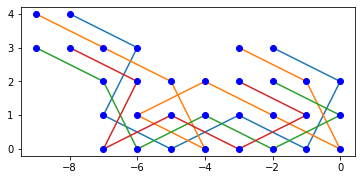

crossings: 30
turns: 22


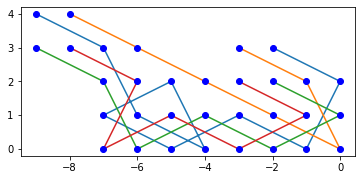

crossings: 31
turns: 21


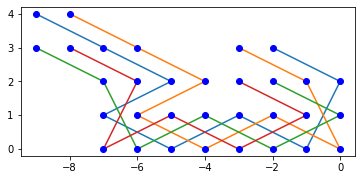

crossings: 28
turns: 22


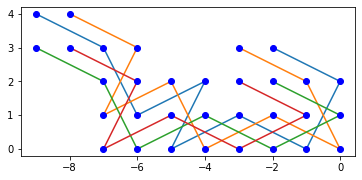

crossings: 34
turns: 24


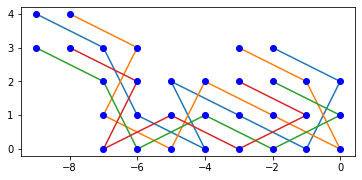

crossings: 32
turns: 22


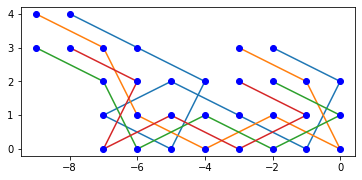

crossings: 32
turns: 22


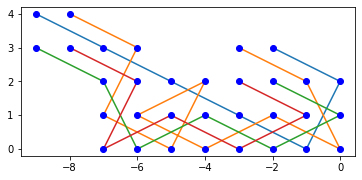

crossings: 31
turns: 21


In [23]:
for p in extend_final:
    show_paths(p)
    print("crossings:",count_crossings(p))
    print("turns:", count_turns(p))
